In [1]:
import os, sys, time, copy, pickle as pkl
import numpy as np
import pandas as pd
import itertools
import torch

import matplotlib.pyplot as plt
import seaborn as sns

import plotting_utils as utils

import importlib

%matplotlib inline 

# Per-task main tables

In [159]:
importlib.reload(utils)

<module 'plotting_utils' from '/Users/pillutla/Dropbox (Facebook)/code/pfl/plotting/plotting_utils.py'>

In [156]:
args = dict(
    init = "pretrained", state = "stateful", ne_finetune=5, ne_pfl=1, 
    use_unweighted_stats = False, finetune_pfl_joint = False, metric_name = "accuracy"
)

ds_and_model = ["emnist_resnetgn", "gldv2b_resnetgn", "so_mini"][2]
df, dfs = utils.get_main_pertask_table_mean_10p(ds_and_model, **args)
df2 = utils.convert_to_string_and_bold_multiindexcol(df, dfs, do_bold=True)
df2 = utils.rename_multilevel_table(df2)

df2

Mean Accuracy \%                           \
                                   Finetune                   PFL-AM   
Non-personalized             $23.82_{0.00}$           $23.82_{0.00}$   
Input Layer         $\mathbf{24.96}_{0.01}$           $24.48_{0.01}$   
Output Layer                 $24.93_{0.01}$  $\mathbf{25.04}_{0.01}$   
Adapter (dim=$16$)           $24.71_{0.00}$  $\mathbf{24.82}_{0.01}$   
Adapter (dim=$64$)           $24.74_{0.01}$  $\mathbf{24.85}_{0.01}$   

                                   10th Percentile Accuracy \%  \
                            PFL-SU                    Finetune   
Non-personalized    $23.82_{0.00}$              $20.17_{0.00}$   
Input Layer         $24.77_{0.02}$     $\mathbf{21.34}_{0.04}$   
Output Layer        $24.76_{0.01}$     $\mathbf{21.42}_{0.04}$   
Adapter (dim=$16$)  $24.34_{0.07}$              $21.16_{0.03}$   
Adapter (dim=$64$)  $24.39_{0.05}$     $\mathbf{21.19}_{0.07}$   

                                                             
                                     PFL-AM          PFL-SU  
Non-personalized             $20.17_{0.00}$  $20.17_{0.00}$  
Input Layer                  $20.76_{0.03}$  $21.14_{0.03}$  
Output Layer                 $21.39_{0.06}$  $21.28_{0.09}$  
Adapter (dim=$16$)  $\mathbf{21.23}_{0.04}$  $20.81_{0.24}$  
Adapter (dim=$64$)           $21.16_{0.03}$  $20.93_{0.16}$

In [348]:
args = dict(
    init = "pretrained", ne_finetune=5, ne_pfl=1, 
    seeds=[1, 2, 3, 4, 5],
    use_unweighted_stats = False, finetune_pfl_joint = True, metric_name="accuracy"
)

ds_and_model = ["emnist_resnetgn", "gldv2b_resnetgn", "so_mini"][2]
print(ds_and_model)
df, dfs = utils.get_main_pertask_table_mean_states(ds_and_model, **args)
df2 = utils.convert_to_string_and_bold_multiindexcol(df, dfs, do_bold=True)
df2 = utils.rename_multilevel_table(df2)

df2

so_mini


Stateful                           \
                                   Finetune                   PFL-AM   
Non-personalized             $23.82_{0.00}$           $23.82_{0.00}$   
Input Layer         $\mathbf{24.96}_{0.01}$           $24.48_{0.01}$   
Output Layer                 $24.93_{0.01}$  $\mathbf{25.04}_{0.01}$   
Adapter (dim=$16$)           $24.71_{0.00}$  $\mathbf{24.82}_{0.01}$   
Adapter (dim=$64$)           $24.74_{0.01}$  $\mathbf{24.85}_{0.01}$   

                                                  Stateless                  \
                            PFL-SU                 Finetune          PFL-AM   
Non-personalized    $23.82_{0.00}$           $23.82_{0.00}$  $23.82_{0.00}$   
Input Layer         $24.78_{0.02}$  $\mathbf{24.96}_{0.01}$  $24.57_{0.02}$   
Output Layer        $24.90_{0.01}$  $\mathbf{24.93}_{0.01}$  $24.56_{0.01}$   
Adapter (dim=$16$)  $24.61_{0.01}$  $\mathbf{24.71}_{0.00}$  $24.47_{0.01}$   
Adapter (dim=$64$)  $24.63_{0.01}$  $\mathbf{24.74}_{0.01}$  $24.48_{0.02}$   

                                    
                            PFL-SU  
Non-personalized    $23.82_{0.00}$  
Input Layer         $24.61_{0.02}$  
Output Layer        $24.54_{0.01}$  
Adapter (dim=$16$)  $24.48_{0.01}$  
Adapter (dim=$64$)  $24.48_{0.01}$

In [379]:
args = dict(
    init = "pretrained", ne_finetune=5, ne_pfl=5, 
    seeds=[1, 2, 3, 4, 5],  # TODO!
    use_unweighted_stats = False, finetune_pfl_joint = True, metric_name="accuracy"
)

ds_and_model = ["emnist_resnetgn", "gldv2b_resnetgn", "so_mini"][0]
print(ds_and_model)
df, dfs = utils.get_main_pertask_table_mean_states(ds_and_model, **args)
df2 = utils.convert_to_string_and_bold_multiindexcol(df, dfs, do_bold=True)
df2 = utils.rename_multilevel_table(df2)

df2

emnist_resnetgn


Stateful                                           \
                        Finetune                   PFL-AM          PFL-SU   
Non-personalized  $93.18_{0.00}$           $93.18_{0.00}$  $93.18_{0.00}$   
Input Layer       $93.29_{0.00}$  $\mathbf{93.62}_{0.03}$  $93.55_{0.05}$   
Output Layer      $93.37_{0.01}$  $\mathbf{93.57}_{0.04}$  $93.55_{0.05}$   
Adapter           $93.66_{0.00}$  $\mathbf{94.13}_{0.03}$  $94.07_{0.03}$   

                       Stateless                                           
                        Finetune                   PFL-AM          PFL-SU  
Non-personalized  $93.18_{0.00}$           $93.18_{0.00}$  $93.18_{0.00}$  
Input Layer       $93.29_{0.00}$  $\mathbf{93.51}_{0.03}$  $93.48_{0.04}$  
Output Layer      $93.37_{0.01}$  $\mathbf{93.53}_{0.03}$  $93.51_{0.04}$  
Adapter           $93.66_{0.00}$  $\mathbf{93.97}_{0.04}$  $93.89_{0.02}$

# Effect of final finetuning

In [32]:
importlib.reload(utils)

<module 'plotting_utils' from '/Users/pillutla/Dropbox (Facebook)/code/pfl/plotting/plotting_utils.py'>

In [382]:
args = dict(
    init="pretrained", state = "stateful", ne_pfl=5, seeds=[2, 3, 4, 5], 
    use_unweighted_stats = False
)

ds_model_list = ["so_mini", "gldv2b_resnetgn", "emnist_resnetgn"]

df_lst = []
for ds_and_model in ds_model_list:
    df, dfs = utils.get_final_finetune_pertask_table(ds_and_model, **args)
    for dfx in [df, dfs]:
        dfx.drop(index=["adapter_64"], errors='ignore', inplace=True)
        dfx.rename(index={'adapter_16': 'adapter'}, inplace=True)
        dfx.rename(index={i:utils.rename_one_item(i) for i in dfx.index}, inplace=True)
    df_lst.append((df, dfs))

index = df.index
columns = pd.MultiIndex.from_product([ds_model_list, df.columns])
df_out = pd.DataFrame(index=index, columns=columns)
df_out_s = pd.DataFrame(index=index, columns=columns)
for row in index:
    for i, ds in enumerate(ds_model_list):
        for c in df.columns:
            df_out.at[row, (ds, c)] = df_lst[i][0].at[row, c]  # mean
            df_out_s.at[row, (ds, c)] = df_lst[i][1].at[row, c]  # std

df_out = utils.convert_to_string_and_bold_multiindexcol(df_out, df_out_s, do_bold=False)
df_out = utils.rename_final_finetune_table_per_task(df_out)
# df_out.to_latex("tables/aggregated/final_finetune_pretrained_stateful.tex", escape=False)
df_out

StackOverflow (Transformer)                GLDv2 (ResNet)  \
                                  PFL-AM         PFL-SU         PFL-AM   
Input Layer               $-0.06_{0.01}$  $0.04_{0.02}$  $0.13_{0.01}$   
Output Layer               $0.00_{0.01}$  $0.26_{0.02}$  $0.49_{0.02}$   
Adapter                    $0.00_{0.02}$  $0.41_{0.08}$  $0.13_{0.02}$   

                            EMNIST (ResNet)                 
                     PFL-SU          PFL-AM         PFL-SU  
Input Layer   $0.16_{0.03}$   $0.12_{0.02}$  $0.12_{0.03}$  
Output Layer  $0.56_{0.03}$   $0.09_{0.01}$  $0.11_{0.02}$  
Adapter       $0.18_{0.01}$   $0.27_{0.02}$  $0.33_{0.03}$

In [383]:
args = dict(
    init="pretrained", state = "stateless", ne_pfl=5, 
    use_unweighted_stats = False
)

ds_model_list = ["so_mini", "gldv2b_resnetgn", "emnist_resnetgn"]

df_lst = []
for ds_and_model in ds_model_list:
    df, dfs = utils.get_final_finetune_pertask_table(ds_and_model, **args)
    for dfx in [df, dfs]:
        dfx.drop(index=["adapter_64"], errors='ignore', inplace=True)
        dfx.rename(index={'adapter_16': 'adapter'}, inplace=True)
        dfx.rename(index={i:utils.rename_one_item(i) for i in dfx.index}, inplace=True)
    df_lst.append((df, dfs))

index = df.index
columns = pd.MultiIndex.from_product([ds_model_list, df.columns])
df_out = pd.DataFrame(index=index, columns=columns)
df_out_s = pd.DataFrame(index=index, columns=columns)
for row in index:
    for i, ds in enumerate(ds_model_list):
        for c in df.columns:
            df_out.at[row, (ds, c)] = df_lst[i][0].at[row, c]  # mean
            df_out_s.at[row, (ds, c)] = df_lst[i][1].at[row, c]  # std

df_out = utils.convert_to_string_and_bold_multiindexcol(df_out, df_out_s, do_bold=False)
df_out = utils.rename_final_finetune_table_per_task(df_out)
# df_out.to_latex("tables/aggregated/final_finetune_pretrained_stateless.tex", escape=False)
df_out


StackOverflow (Transformer)                 GLDv2 (ResNet)  \
                                  PFL-AM         PFL-SU          PFL-AM   
Input Layer                $0.86_{0.03}$  $1.00_{0.02}$   $0.44_{0.03}$   
Output Layer               $1.08_{0.03}$  $1.10_{0.02}$   $1.47_{0.04}$   
Adapter                    $0.84_{0.04}$  $0.88_{0.02}$  $11.68_{0.20}$   

                             EMNIST (ResNet)                 
                      PFL-SU          PFL-AM         PFL-SU  
Input Layer    $0.42_{0.03}$   $0.11_{0.02}$  $0.10_{0.04}$  
Output Layer   $1.46_{0.05}$   $0.15_{0.02}$  $0.11_{0.02}$  
Adapter       $10.42_{0.09}$   $0.46_{0.02}$  $0.42_{0.04}$

# Stateless vs Stateful scatter plot

In [152]:
importlib.reload(utils)

<module 'plotting_utils' from '/private/home/pillutla/pfl/plotting/plotting_utils.py'>

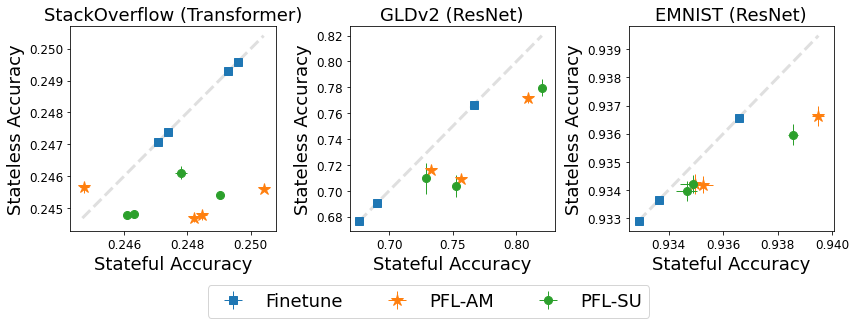

In [99]:
args = dict(
    init = "pretrained", ne_finetune=5, ne_pfl=1, 
    use_unweighted_stats = False, finetune_pfl_joint = True,
)

ds_model_list = ["so_mini", "gldv2_resnetgn", "emnist_resnetgn"]
n_plots = len(ds_model_list)

df_stateful_lst = [utils.get_main_pertask_table_mean(ds_and_model, state="stateful", **args) for ds_and_model in ds_model_list]
df_stateless_lst = [utils.get_main_pertask_table_mean(ds_and_model, state="stateless", **args) for ds_and_model in ds_model_list]

styles = [{'color': utils.COLORS[0], 'marker': 's', 'markersize':8, 'linewidth': 1},
    {'color': utils.COLORS[1], 'marker': '*', 'markersize': 13, 'linewidth': 1},
    {'color': utils.COLORS[2], 'marker': 'o', 'markersize': 8, 'linewidth': 1}
]

f, ax = plt.subplots(1, n_plots, figsize=(4,*n_plots, 4))
for i in range(n_plots):
    df1 = df_stateful_lst[i][0].drop(index=["pretrained"])
    df1s = df_stateful_lst[i][1].drop(index=["pretrained"])
    df2 = df_stateless_lst[i][0].drop(index=["pretrained"])
    df2s = df_stateless_lst[i][1].drop(index=["pretrained"])
    for j, pfl_algo in enumerate(df1.columns):
        ax[i].errorbar(df1[pfl_algo], df2[pfl_algo], xerr=df1s[pfl_algo], yerr=df2s[pfl_algo], linestyle='None', 
                        label=None if i>=1 else utils.pfl_algo_rename_dict[pfl_algo],
                        **styles[j])
    # y = x line
    x1 = min(df1.to_numpy().min(), df2.to_numpy().min())
    x2 = max(df1.to_numpy().max(), df2.to_numpy().max())
    ax[i].plot([x1, x2], [x1, x2], alpha=0.5, color='silver', linestyle='dashed')
    ax[i].set_xlabel("Stateful Accuracy")
    ax[i].set_ylabel("Stateless Accuracy")
    ax[i].set_title(utils.dataset_rename_dict[ds_model_list[i]])
lgd = f.legend(loc="lower center", bbox_to_anchor=(0.5, -0.15), ncol=3)

plt.tight_layout()
        

In [181]:
del df1, df2

# Personalization increase versus #Params

In [214]:
importlib.reload(utils)

<module 'plotting_utils' from '/Users/pillutla/Dropbox (Facebook)/code/pfl/plotting/plotting_utils.py'>

so_mini 0 0.2520385404937458 0.238207030918768
gldv2b_resnetgn 1 0.6285356309213237 0.5143347521625704
emnist_resnetgn 2 0.9413323990586743 0.9317538803247045


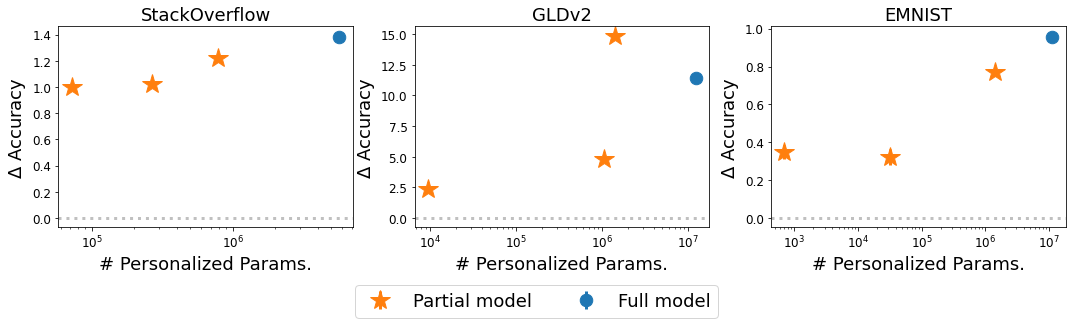

In [384]:
args = dict(
    init = "pretrained", state="stateful", ne_finetune=5, ne_pfl=1, 
    use_unweighted_stats = False, finetune_pfl_joint = True,
)

styles = [{'color': utils.COLORS[0], 'marker': 'o', 'markersize': 12.5, 'linestyle':"None"},
    {'color': utils.COLORS[1], 'marker': '*', 'markersize': 20.0, 'linestyle': 'None'},
    {'color': utils.COLORS[2], 'marker': 's', 'markersize': 10.0, 'linestyle': 'None'}
]

ds_model_list = ["so_mini", "gldv2b_resnetgn", "emnist_resnetgn"]
n_plots = len(ds_model_list)

####### For full model personalization
seeds = [2, 3, 4, 5]
ne_finetune = 5
ne_pfl = 5
pfl_algo = 'pfl_alternating'
state = 'stateful'
init = 'pretrained'

df1, df1s =  utils.get_main_combined_table(
    ds_and_model_lst, pfl_algo, init, state, seeds, ne_finetune=5, ne_pfl=1,
    use_unweighted_stats=False, metric_name='accuracy'
)
######

###### For partial model personalization
df_lst = [utils.get_main_pertask_table_mean(ds_and_model, **args) for ds_and_model in ds_model_list]
num_params_all = utils.get_num_params()
######

##### Plot
f, ax = plt.subplots(1, n_plots, figsize=(5*n_plots, 4))
for i in range(n_plots):
    ds_and_model = ds_model_list[i]
    df, dfs = df_lst[i]
    pretrained_val = df.at["pretrained", df.columns.to_list()[0]]
    for dfx in [df, dfs]: dfx.drop(index=["pretrained", "tr_layer_0"], errors='ignore', inplace=True)
    num_params = pd.Series(num_params_all[ds_model_list[i]])
    ax[i].errorbar(num_params[df.index.to_numpy()], 100*(df[pfl_algo] - pretrained_val),
        yerr= 100*dfs[pfl_algo],
        label=None if i>=1 else 'Partial model', **styles[1])
    full_params = num_params['full']
    print(ds_and_model, i, 
         df1.at[("Full Model", "Finetune"), utils.dataset_rename_dict_short[ds_and_model]],
          pretrained_val
         )
    ax[i].errorbar(full_params, 
        100 * (df1.at[("Full Model", "Finetune"), utils.dataset_rename_dict_short[ds_and_model]] - pretrained_val),
        yerr = 100 * df1s.at[("Full Model", "Finetune"), utils.dataset_rename_dict_short[ds_and_model]],
        label=None if i>=1 else 'Full model',
        **styles[0]
    )
    ax[i].set_xscale('log')
    ax[i].set_xlabel("# Personalized Params.")
    ax[i].set_ylabel(r"$\Delta$ Accuracy")
    ax[i].set_title(utils.dataset_rename_dict_short[ds_model_list[i]])
    ax[i].axhline(y=0, color='silver', linestyle='dotted')
lgd = f.legend(loc="lower center", bbox_to_anchor=(0.5, -0.15), ncol=3)

plt.tight_layout()
        

,finetune,pfl_alternating,pfl_joint
inp_layer,0.00002,0.000365,0.000374
out_layer,0.000067,0.000437,0.000501
adapter,0.000029,0.000222,0.000189


# Per-client statistics

In [247]:
importlib.reload(utils)

<module 'plotting_utils' from '/Users/pillutla/Dropbox (Facebook)/code/pfl/plotting/plotting_utils.py'>

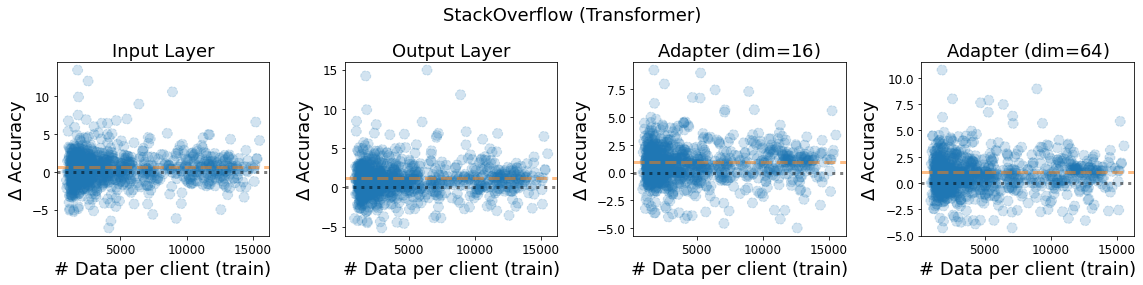

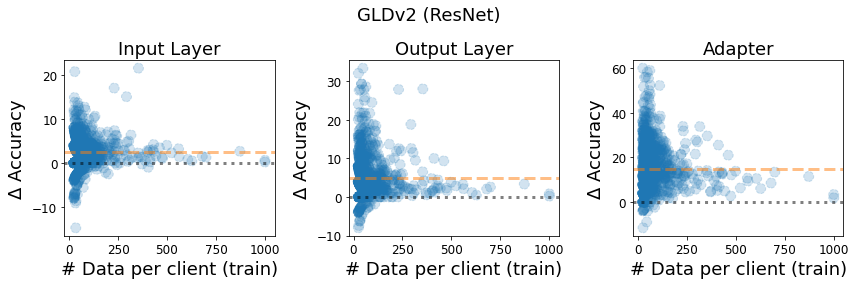

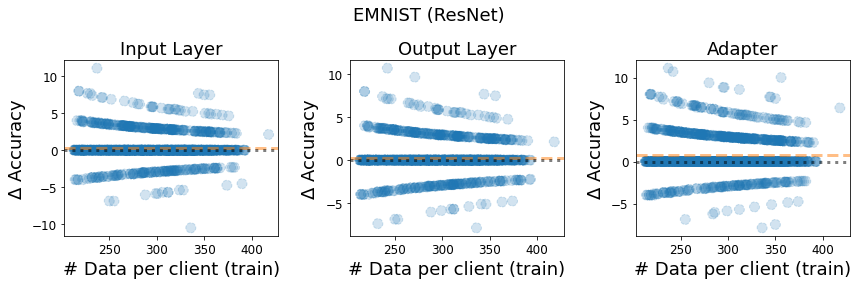

In [248]:
ds_model_list = ["so_mini", "gldv2b_resnetgn", "emnist_resnetgn"]
args = dict(
    init = "pretrained", state="stateful", seed=1, num_epochs_finetune=1,
)
kwargs = dict(
    pfl_algo = "pfl_alternating",
    metric_name = 'accuracy',
    min_is_best = False,
    x_train_or_test = 'train'
)

for ds_and_model in ds_model_list:
    utils.per_user_stats_scatter_plot(ds_and_model, args=args, **kwargs)


In [271]:
importlib.reload(utils)

<module 'plotting_utils' from '/Users/pillutla/Dropbox (Facebook)/code/pfl/plotting/plotting_utils.py'>

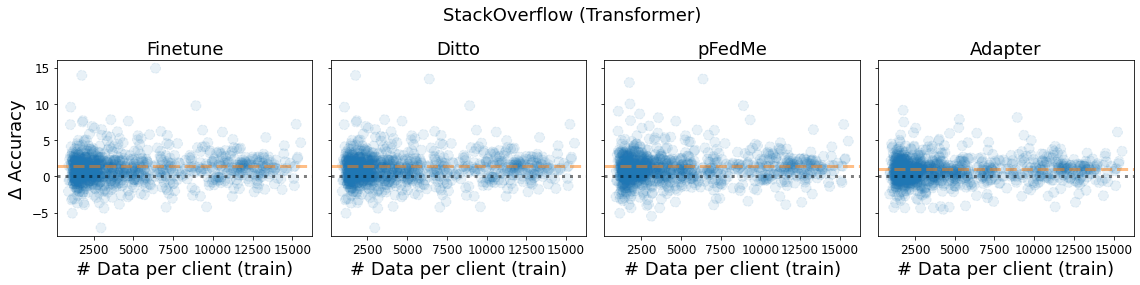

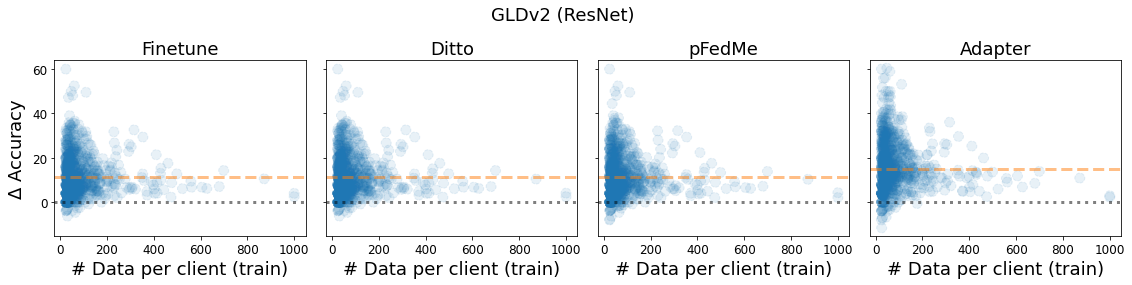

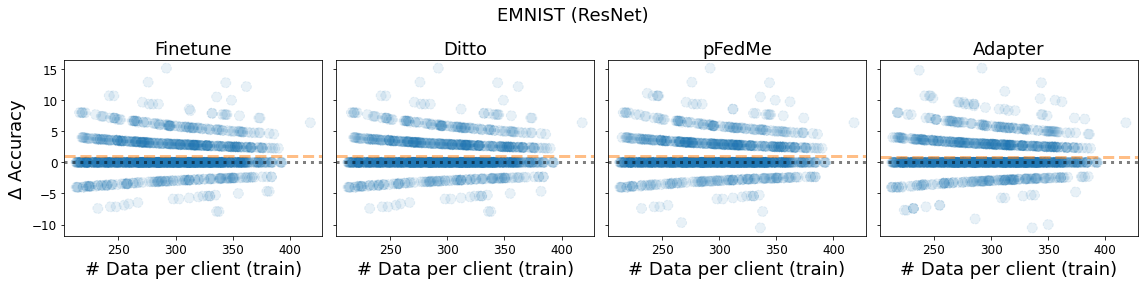

In [387]:
ds_model_list = ["so_mini", "gldv2b_resnetgn", "emnist_resnetgn"]
args = dict(
    init = "pretrained", state="stateful", seed=2, num_epochs_finetune=5,
)
kwargs = dict(
    pfl_algo = "pfl_alternating",
    metric_name = 'accuracy',
    min_is_best = False,
    x_train_or_test = 'train',
    train_or_test = 'test',
)

for ds_and_model in ds_model_list:
    utils.per_user_stats_scatter_plot_full_v_partial(ds_and_model, args=args, **kwargs)



In [336]:
importlib.reload(utils)

<module 'plotting_utils' from '/Users/pillutla/Dropbox (Facebook)/code/pfl/plotting/plotting_utils.py'>

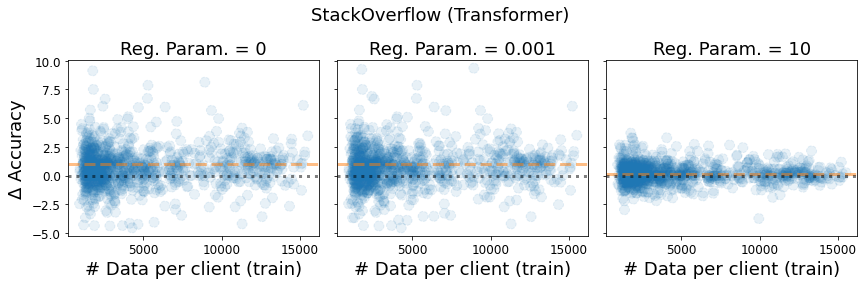

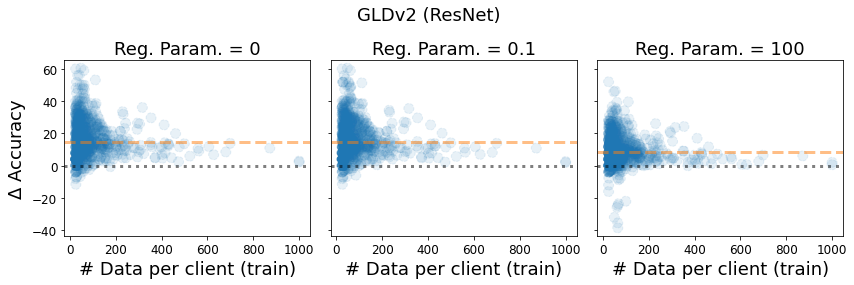

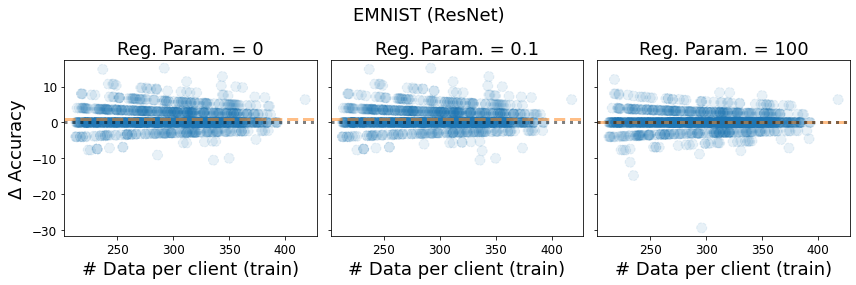

In [391]:
ds_model_list = ["so_mini", "gldv2b_resnetgn", "emnist_resnetgn"]
args = dict(
    init = "pretrained", state="stateful", seed=2, num_epochs_finetune=5,
)
kwargs = dict(
    pfl_algo = "pfl_alternating",
    metric_name = 'accuracy',
    min_is_best = False,
    x_train_or_test = 'train',
    train_or_test = 'test'
)

for ds_and_model in ds_model_list:
    utils.per_user_stats_scatter_plot_regularization(ds_and_model, args=args, **kwargs)





In [393]:
importlib.reload(utils)

<module 'plotting_utils' from '/Users/pillutla/Dropbox (Facebook)/code/pfl/plotting/plotting_utils.py'>

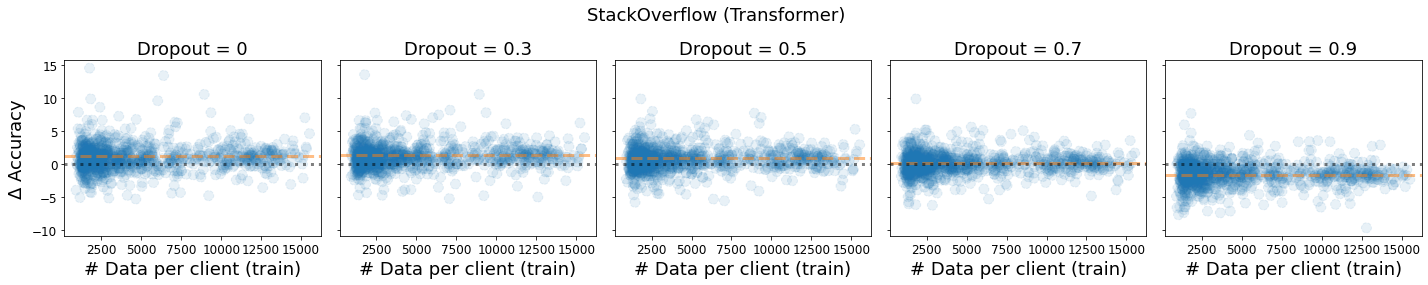

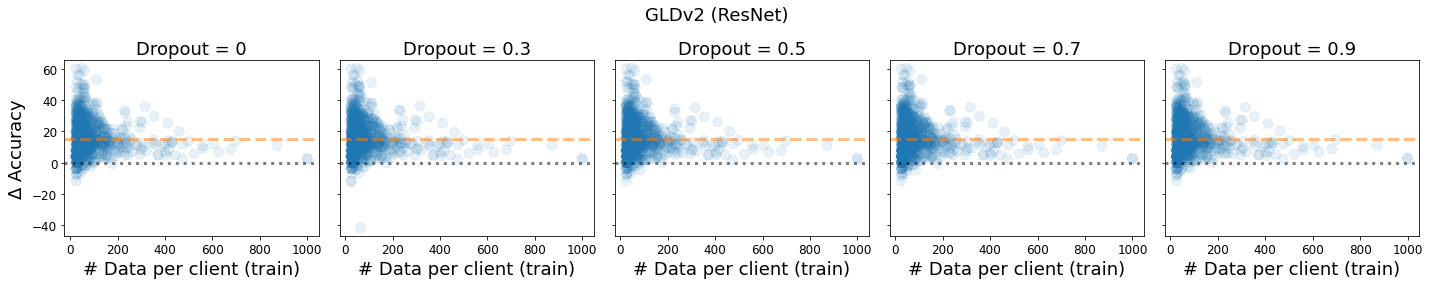

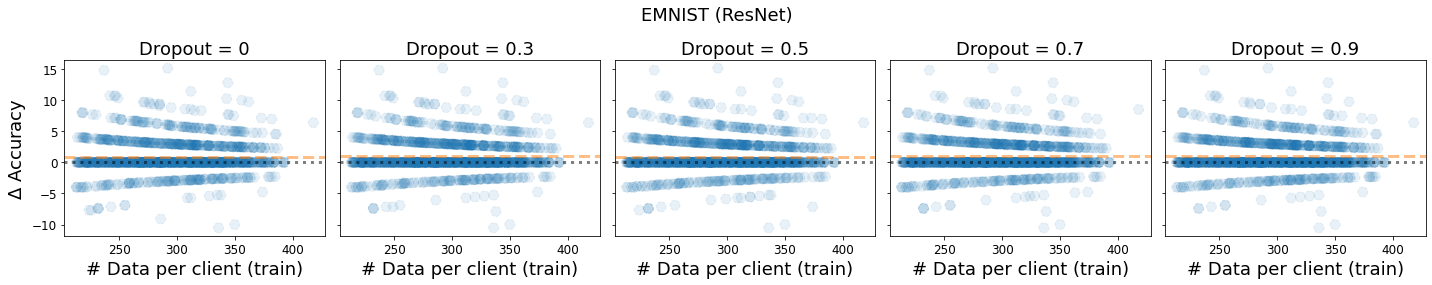

In [394]:
ds_model_list = ["so_mini", "gldv2b_resnetgn", "emnist_resnetgn"]
args = dict(
    init = "pretrained", state="stateful", seed=2, num_epochs_finetune=5,
)
kwargs = dict(
    pfl_algo = "pfl_alternating",
    metric_name = 'accuracy',
    min_is_best = False,
    x_train_or_test = 'train',
    train_or_test = 'test'
)

for ds_and_model in ds_model_list:
    utils.per_user_stats_scatter_plot_dropout(ds_and_model, args=args, **kwargs)





# Generalization: Scatter versus Non-Personalized Accuracy

In [299]:
importlib.reload(utils)

<module 'plotting_utils' from '/Users/pillutla/Dropbox (Facebook)/code/pfl/plotting/plotting_utils.py'>

so_mini 0 (-0.09741122367025529, 0.002043080902256677)
so_mini 1 (-0.09746123778857033, 0.002032182316479809)
so_mini 2 (-0.13565919425938994, 1.673873604233238e-05)
so_mini 3 (-0.11478647785999534, 0.00027545113060416487)
gldv2b_resnetgn 0 (-0.11679922147620392, 0.000787540260012277)
gldv2b_resnetgn 1 (-0.216612529247158, 3.39813685385186e-10)
gldv2b_resnetgn 2 (-0.4046417793545021, 9.059344239910445e-34)
emnist_resnetgn 0 (-0.21488214542072048, 4.203826748150962e-13)
emnist_resnetgn 1 (-0.23606759524671633, 1.4236360452305264e-15)
emnist_resnetgn 2 (-0.3165803853108675, 2.3650133595330057e-27)


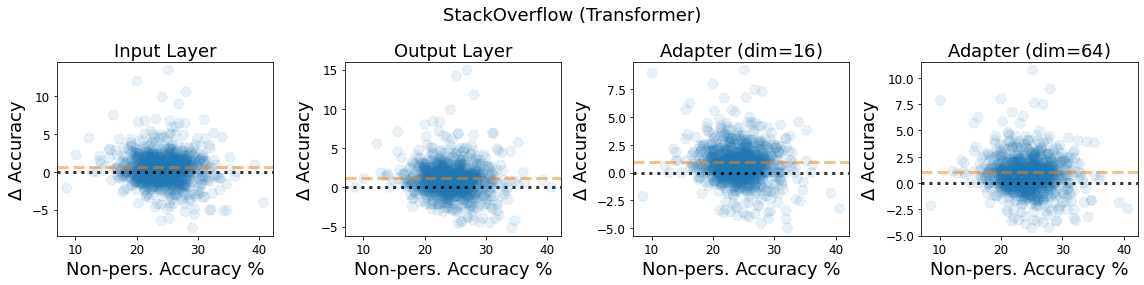

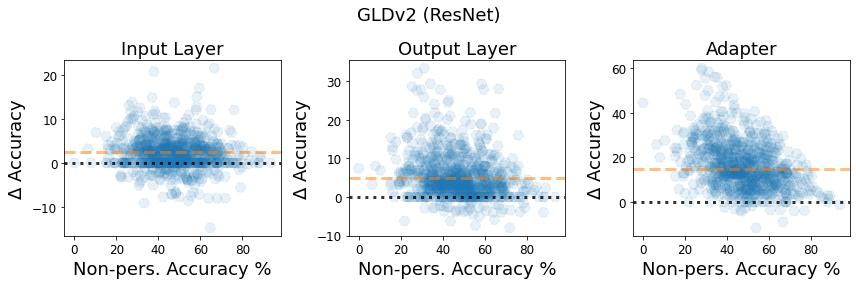

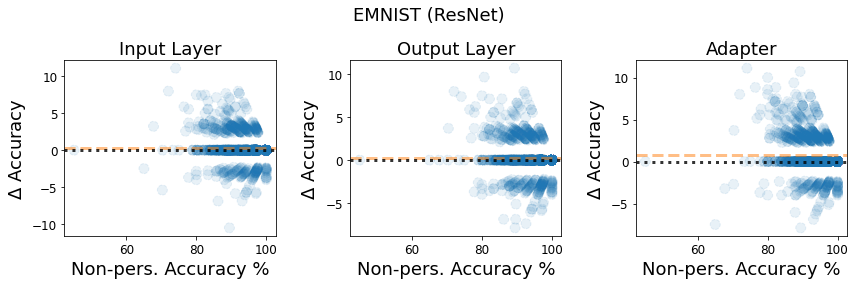

In [340]:
ds_model_list = ["so_mini", "gldv2b_resnetgn", "emnist_resnetgn"]
args = dict(
    init = "pretrained", state="stateful", seed=1, num_epochs_finetune=1,
)
kwargs = dict(
    pfl_algo = "pfl_alternating",
    metric_name = 'accuracy',
    min_is_best = False,
    kdeplot=False
)

for ds_and_model in ds_model_list:
    utils.per_user_stats_scatter_plot_2(ds_and_model, args=args, **kwargs)


In [134]:
importlib.reload(utils)

<module 'plotting_utils' from '/Users/pillutla/Dropbox (Facebook)/code/pfl/plotting/plotting_utils.py'>

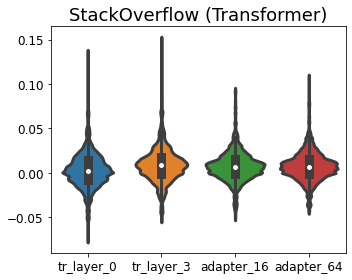

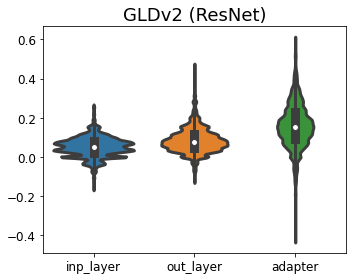

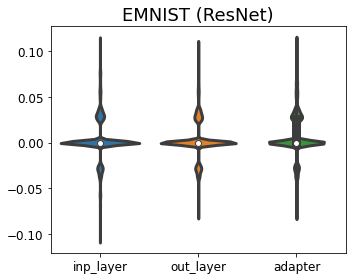

In [135]:
ds_model_list = ["so_mini", "gldv2_resnetgn", "emnist_resnetgn"]
args = dict(
    init = "pretrained", state="stateful", seed=1, num_epochs_finetune=1,
)
kwargs = dict(
    pfl_algo = "pfl_alternating",
    metric_name = 'accuracy',
    min_is_best = False,
    boxplot=False
)

for ds_and_model in ds_model_list:
    utils.per_user_stats_scatter_plot_3(ds_and_model, args=args, **kwargs)


# Per-Seed Behavior

In [262]:
importlib.reload(utils)

<module 'plotting_utils' from '/Users/pillutla/Dropbox (Facebook)/code/pfl/plotting/plotting_utils.py'>

Test metrics


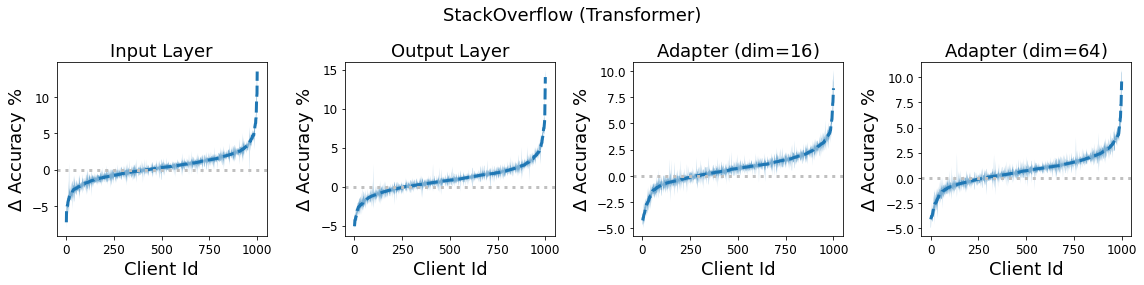

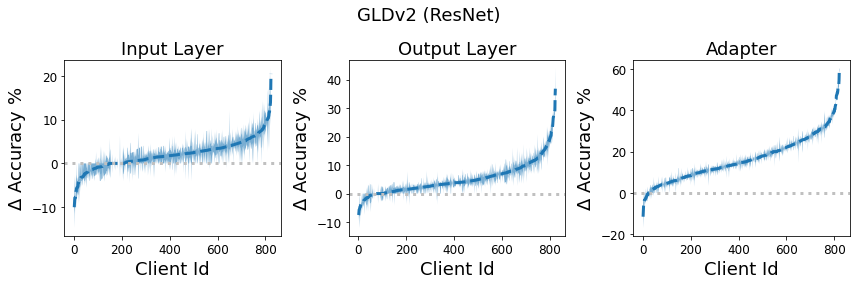

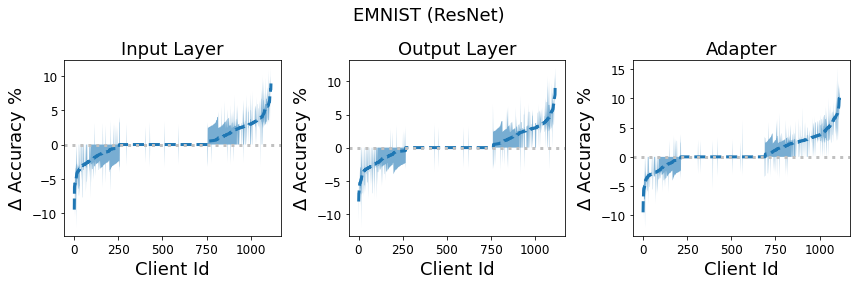

In [255]:
ds_model_list = ["so_mini", "gldv2b_resnetgn", "emnist_resnetgn"]
args = dict(
    init = "pretrained", state="stateful", num_epochs_finetune=1,
)
kwargs = dict(
    pfl_algo = "pfl_alternating",
    metric_name = 'accuracy',
    min_is_best = False,
)

for ds_and_model in ds_model_list:
    utils.per_user_stats_scatter_plot_4(ds_and_model, args=args, **kwargs)

print('Test metrics')

Train metrics


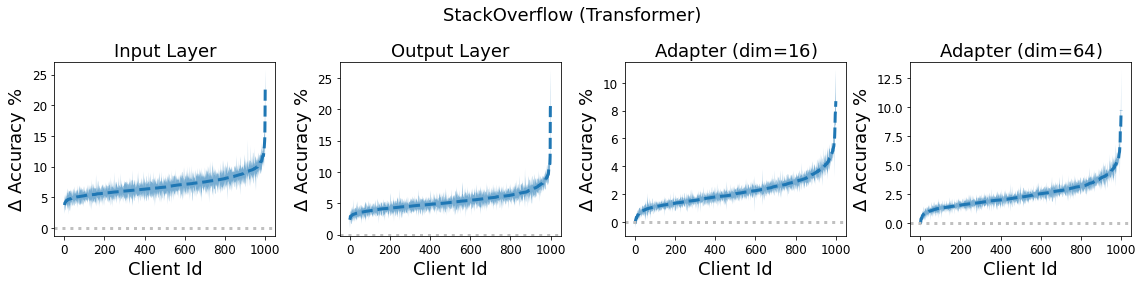

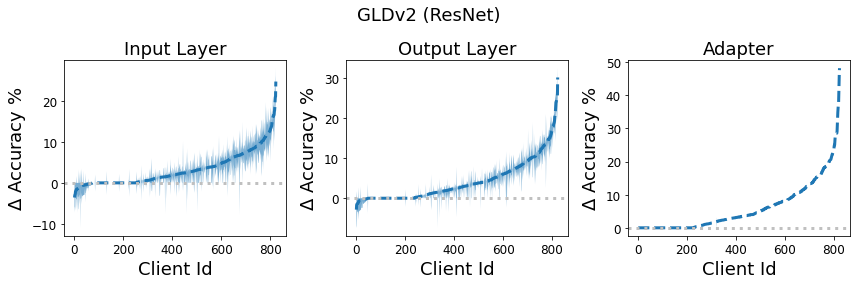

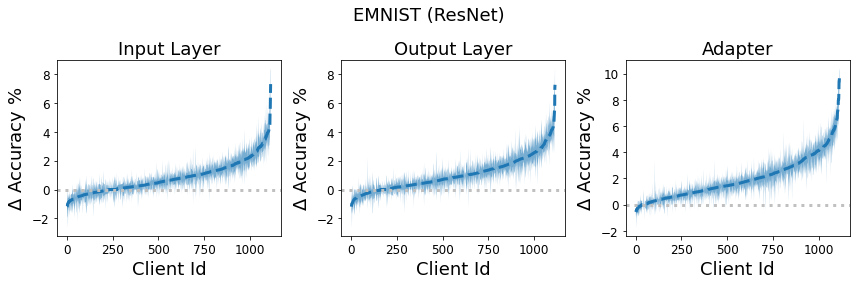

In [250]:
ds_model_list = ["so_mini", "gldv2b_resnetgn", "emnist_resnetgn"]
args = dict(
    init = "pretrained", state="stateful", num_epochs_finetune=1,
)
kwargs = dict(
    pfl_algo = "pfl_alternating",
    metric_name = 'accuracy',
    min_is_best = False,
    train=True
)

for ds_and_model in ds_model_list:
    utils.per_user_stats_scatter_plot_4(ds_and_model, args=args, **kwargs)

print('Train metrics')

Test metrics


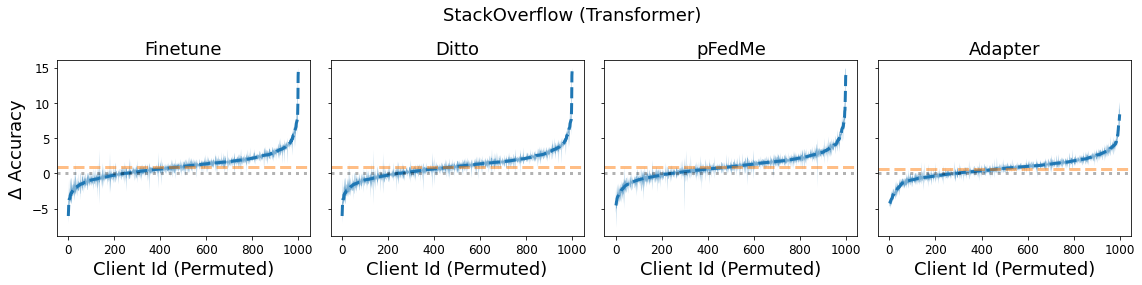

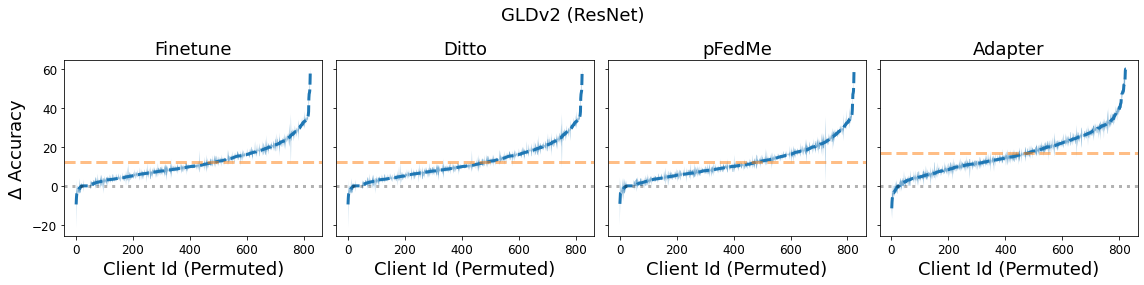

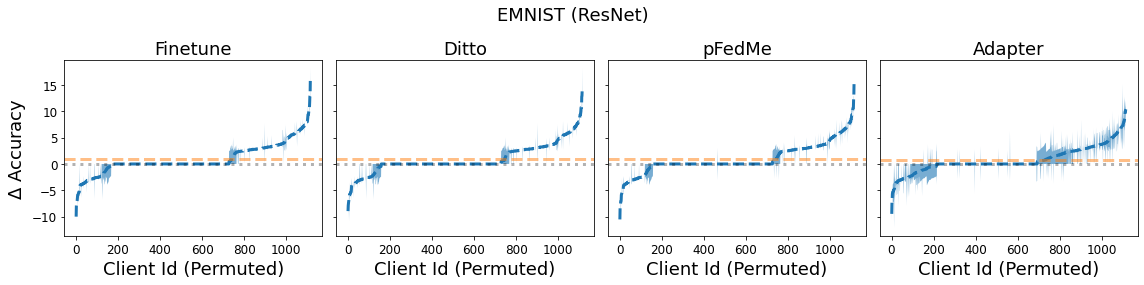

In [302]:
ds_model_list = ["so_mini", "gldv2b_resnetgn", "emnist_resnetgn"]
args = dict(
    init = "pretrained", state="stateful", num_epochs_finetune=1,
)
kwargs = dict(
    pfl_algo = "pfl_alternating",
    metric_name = 'accuracy',
    min_is_best = False,
    train=False
)

for ds_and_model in ds_model_list:
    utils.per_user_stats_scatter_plot_full_v_partial_4(ds_and_model, args=args, **kwargs)

print('Test metrics')

# Main Table: Summary

In [307]:
importlib.reload(utils)

<module 'plotting_utils' from '/Users/pillutla/Dropbox (Facebook)/code/pfl/plotting/plotting_utils.py'>

In [388]:
ds_and_model_lst = ["so_mini", "gldv2b_resnetgn", "emnist_resnetgn"]
seeds = [2, 3, 4, 5]  # TODO
pfl_algo = 'pfl_alternating'
state = 'stateful'
init = 'pretrained'

df, dfs = utils.get_main_combined_table(
    ds_and_model_lst, pfl_algo, init, state, seeds, ne_finetune=5, ne_pfl=5,
    use_unweighted_stats=False, metric_name='accuracy'
)

df2 = utils.convert_to_string_and_bold_maxpercol(df, dfs, do_bold=True, print_std=True)


In [389]:
df2

StackOverflow  \
Non-personalized                        $23.82_{0.00}$   
Full Model       Finetune               $25.20_{0.01}$   
                 Ditto                  $25.20_{0.01}$   
                 pFedMe        $\mathbf{25.21}_{0.01}$   
PFL              Input Layer            $24.44_{0.01}$   
                 Output Layer           $25.05_{0.01}$   
                 Adapter                $24.82_{0.01}$   

                                                 GLDv2  \
Non-personalized                        $51.43_{0.00}$   
Full Model       Finetune               $62.85_{0.02}$   
                 Ditto                  $62.85_{0.02}$   
                 pFedMe                 $62.92_{0.02}$   
PFL              Input Layer            $53.94_{0.08}$   
                 Output Layer           $56.63_{0.06}$   
                 Adapter       $\mathbf{66.39}_{0.01}$   

                                                EMNIST  
Non-personalized                        $93.18_{0.00}$  
Full Model       Finetune               $94.13_{0.01}$  
                 Ditto                  $94.13_{0.01}$  
                 pFedMe                 $94.13_{0.01}$  
PFL              Input Layer            $93.63_{0.03}$  
                 Output Layer           $93.59_{0.02}$  
                 Adapter       $\mathbf{94.14}_{0.02}$

In [227]:
df2

StackOverflow  \
Non-personalized                        $23.82_{0.00}$   
Full Model       Finetune               $25.20_{0.01}$   
                 Ditto                  $25.20_{0.01}$   
                 pFedMe        $\mathbf{25.21}_{0.01}$   
PFL              Input Layer            $24.48_{0.02}$   
                 Output Layer           $25.04_{0.01}$   
                 Adapter                $24.82_{0.01}$   

                                                 GLDv2  \
Non-personalized                        $51.43_{0.00}$   
Full Model       Finetune               $62.85_{0.02}$   
                 Ditto                  $62.85_{0.01}$   
                 pFedMe                 $62.92_{0.02}$   
PFL              Input Layer            $53.84_{0.08}$   
                 Output Layer           $56.26_{0.06}$   
                 Adapter       $\mathbf{66.28}_{0.04}$   

                                                EMNIST  
Non-personalized                        $93.18_{0.00}$  
Full Model       Finetune               $94.13_{0.01}$  
                 Ditto                  $94.13_{0.01}$  
                 pFedMe        $\mathbf{94.13}_{0.01}$  
PFL              Input Layer            $93.52_{0.04}$  
                 Output Layer           $93.50_{0.05}$  
                 Adapter                $93.95_{0.02}$